# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.413627e+01     1.523478e+01
 * time: 0.0033729076385498047
     1     6.475086e+01     9.838526e+00
 * time: 0.009812116622924805
     2     5.831314e+01     1.417046e+01
 * time: 0.02469611167907715
     3     4.311809e+01     9.877045e+00
 * time: 0.04541802406311035
     4     3.406002e+01     9.533188e+00
 * time: 0.06633400917053223
     5     1.498982e+01     2.571704e+00
 * time: 0.16554594039916992
     6     1.071758e+01     3.970776e+00
 * time: 0.18067002296447754
     7     9.550129e+00     2.236641e+00
 * time: 0.19563698768615723
     8     8.720012e+00     2.760483e+00
 * time: 0.21051502227783203
     9     8.145975e+00     2.008919e+00
 * time: 0.22533106803894043
    10     7.629193e+00     1.759701e+00
 * time: 0.24016809463500977
    11     7.487142e+00     2.660272e+00
 * time: 0.2521970272064209
    12     7.148762e+00     1.877939e+00
 * time: 0.2641890048980713
    13     6.743359e+00     1.280756e+00
 * time

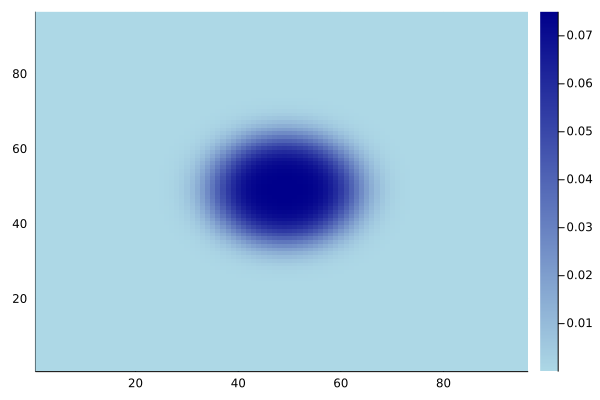

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))